C:\Users\craig\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\craig\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\craig\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


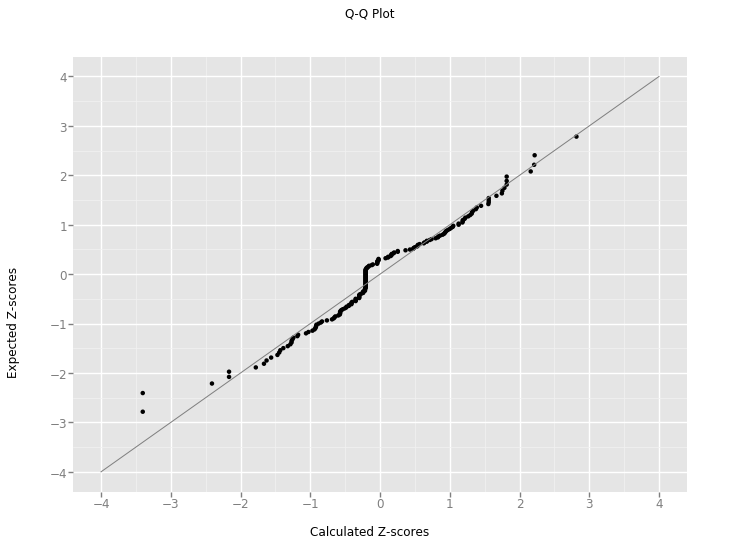

<ggplot: (131948386045)>


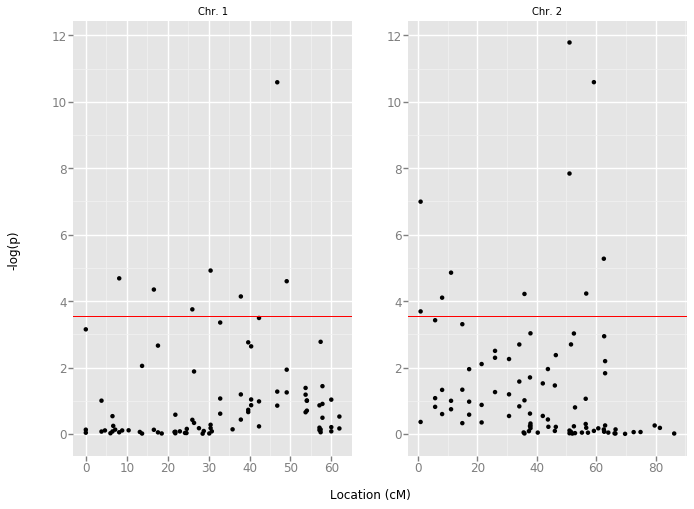

<ggplot: (131948632142)>


Chromosome       Locus   Position             p
16          2  D2M33 - MT  51.041764  1.622912e-12
8           2  D2M12 - MT  59.257073  2.544684e-11
5           1  D1M19 - MT  46.768411  2.564652e-11
15          2  D2M32 - MT  51.037196  1.437432e-08
11          2  D2M16 - MT   0.901597  1.011010e-07
9           2  D2M13 - MT  62.598022  5.290498e-06
3           1  D1M13 - MT  30.482452  1.203391e-05
13          2  D2M19 - MT  11.151895  1.391680e-05
0           1   D1M6 - MT   8.160813  2.063650e-05
6           1  D1M20 - TT  49.078885  2.518925e-05
1           1   D1M8 - MT  16.625142  4.488769e-05
7           2  D2M11 - MT  56.671324  5.922307e-05
14          2  D2M26 - TT  35.873683  6.083062e-05
4           1  D1M15 - MM  37.874908  7.247472e-05
12          2  D2M18 - MT    8.14509  7.881638e-05
2           1  D1M12 - MT  26.024026  1.772689e-04
10          2  D2M16 - MM   0.901597  2.046322e-04

In [ ]:
# Import various packages to allow the program to run
from tkinter import *
from PIL import Image
from PIL import ImageTk
import re
import csv
import statistics
import scipy.stats
import numpy
import pandas
import math
from ggplot import *

class App:
    def __init__(self, master):
        """
        Initializes all the tkinter objects for this class.
        """
        
        """Initializing and adding button objects to the master buttons list"""
        # Button 1 is for retrieving phenotype files
        self.b1 = Button(text = "Retrieve Phenotype File", 
                         width = 20, 
                         command = self.Retrieve_Phenotype_File)
        self.b1.grid(row = 1, column = 1, pady = 10, padx = 10)
        buttons.append(self.b1)
        
        # Button 2 is for retrieving genotype files
        self.b2 = Button(text = "Retrieve Genotype File", 
                         width = 20, command = self.Retrieve_Genotype_File)
        self.b2.grid(row = 4, column = 1, pady = 10, padx = 10)
        buttons.append(self.b2)
        
        # Button 3 is for resetting the enire app back to the initial state
        self.b3 = Button(text = "Reset", width = 20, command = self.Reset)
        self.b3.grid(row = 7, column = 1, pady = 10, padx = 10)
        buttons.append(self.b3)
        
        # Button 4 is for retrieving the first genotype letter
        self.b4 = Button(text = "Genotype 1 Letter", 
                         width = 20, 
                         command = self.Get_Genotype_1)
        buttons.append(self.b4)
        
        # Button 5 is for retrieving the second genotype letter
        self.b5 = Button(text = "Genotype 2 Letter", 
                         width = 20, 
                         command = self.Get_Genotype_2)
        buttons.append(self.b5)
        
        # Button 6 is for retrieving code for a bad or unreadable genotype
        self.b6 = Button(text = "Bad Genotype Code", 
                         width = 20, 
                         command = self.Get_Bad_Genotype)
        buttons.append(self.b6)
        
        # Button 7 is for doing the actual analysis
        self.b7 = Button(text = "Analyze!", width = 20, command = self.Analyze)
        buttons.append(self.b7)
        
        # Button 8 is for quitting the program
        self.b8 = Button(text = "Quit", width = 20, command = self.Quit)
        self.b8.grid(row = 7, column = 2, pady = 10, padx = 10, sticky = E)
        buttons.append(self.b8)
        
        """Initializing and adding label objects to the master labels list"""
        # Label 1 is used to display a message for a phenotype file extension
        self.l1 = Label(text = "", fg = "red", height = 3, width = 50)
        labels.append(self.l1)
        
        # Label 2 is used to display amessage for a genotype file extension
        self.l2 = Label(text = "", fg = "red", height = 3, width = 50)
        labels.append(self.l2)
        
        # Label 3 is used to show where output will be displayed
        self.l3 = Label(text = "Output will be in python terminal.", height = 3)
        labels.append(self.l3)
        
        """Initializing and adding frame objects to the master frames list"""
        # Frame 1 added for aesthetic purposes
        self.f1 = Frame(height = 51)
        self.f1.grid(row = 2, column = 1, columnspan = 2)
        frames.append(self.f1)
        
        # Frame 2 added for aesthetic purposes
        self.f2 = Frame(height = 25)
        self.f2.grid(row = 3, column = 1, columnspan = 2)
        frames.append(self.f2)
        
        # Frame 3 added for aesthetic purposes
        self.f3 = Frame(height = 51)
        self.f3.grid(row = 5, column = 1, columnspan = 2)
        frames.append(self.f3)
        
        # Frame 4 added for aesthetic purposes
        self.f4 = Frame(height = 51)
        self.f4.grid(row = 6, column = 1, columnspan = 2)
        frames.append(self.f4)
        
        """Initializing and adding entry objects to the master entries list"""
        # Entry 1 used to take in phenotype file
        self.e1 = Entry(width = 50)
        self.e1.grid(row = 1, column = 2, pady = 10, padx = 10)
        entries.append(self.e1)
        
        # Entry 2 used to take in genotype file
        self.e2 = Entry(width = 50)
        self.e2.grid(row = 4, column = 2, pady = 10, padx = 10)
        entries.append(self.e2)
        
        # Entry 3 used to take in the first genotype letter
        self.e3 = Entry(width = 50)
        entries.append(self.e3)
        
        # Entry 4 used to take in the second genotype letter
        self.e4 = Entry(width = 50)
        entries.append(self.e4)
        
        # Entry 5 used to take in a bad or unreadable genotype
        self.e5 = Entry(width = 50)
        entries.append(self.e5)
        
        return None
    
    
    def Does_File_Exist(self, filename):
        """
        Checks if the input file exists at the location specified.
        """
        
        # A starting message is generated that will be returned if the location is good
        message = "File was found!"
        
        # Try to open the file to check if it exists
        try:
            with open(filename) as f:
                f.close()
        
        # If the file does not exist the message is changed
        except:
            message = "Error: Location could not be found.\n'" + filename + "'"
            return message
        
        # The message is returned
        return message

    def Is_Compatable_File(self, filename):
        """
        Takes in a filename and checks to make sure the extension is an acceptable type.  
        Returns a string message as the result.
        """
        
        message = "File was found!"
        
        compatable_file = False
            # The boolean variable that returns true if the file ends in an extention specified 
            # in the excel_extention_types variable
        
        # Checks the extention type and returns True if good
        if (re.split("\.", filename)[-1]) == 'csv':
            compatable_file = True
        
        # Specifies the message if the filetype was wrong
        if compatable_file == False:
            message = "Error: Could not find file.  Make sure file has a '.csv.' extension."
            message = message + "\n'" + filename + "'"
            return message
        
        # Specifies the message if the file cannot be found
        message = self.Does_File_Exist(filename)
        
        # A message for a succesful file is made
        return message
    
    
    def Retrieve_Phenotype_File(self):
        """
        This program is run if button 1 is pressed.  It checks to see if the file is compatable.
        If not an error message is displayed.  Otherwise the filename is accepted.
        """
        
        # The phenotype filename is retrieved from entry 1 and all "\" are replaced with "/"
        global phenotype_filename
        global genotype_filename
        phenotype_filename = entries[1].get()
        phenotype_filename = phenotype_filename.replace("\\", "/")
        
        # Gathers a message from checking the file and Checks to see if it as error message or
        # not
        message = self.Is_Compatable_File(phenotype_filename)
        compatable_file = True
        if message[0:5] == "Error":
            # First any previous objects are removed
            buttons[4].grid_forget()
            buttons[5].grid_forget()
            buttons[6].grid_forget()
            entries[3].grid_forget()
            entries[4].grid_forget()
            entries[5].grid_forget()
            
            # Then the compatable_file variable is changed
            compatable_file = False
            
        
        # If the file is compatable it is used in the analysis.  Also if an error message had 
        # previously been displayed it is removed.
        if compatable_file:
            frames[1].grid_forget()
            labels[1]['text'] = message
            labels[1]['fg'] = "blue"
            labels[1].grid(row = 2, column = 1, columnspan = 2)
            
            # Also check to see if both files are entered and remodel the widget accordingly
            if phenotype_filename != "":
                if genotype_filename != "":
                    # Remove any objects in the way
                    frames[4].grid_forget()
                    
                    # Add the new button and entry field
                    buttons[4].grid(row = 6, column = 1, pady = 13, padx = 10)
                    entries[3].grid(row = 6, column = 2, pady = 13, padx = 10)
            
        # If the file is not compatable an error message is displayed
        elif not compatable_file:
            frames[1].grid_forget()
            labels[1]['text'] = message
            labels[1]['fg'] = "red"
            labels[1].grid(row = 2, column = 1, columnspan = 2)
            phenotype_filename = ""
        
        return None

    
    def Retrieve_Genotype_File(self):
        """
        This program is run if button 2 is pressed.  It checks to see if the file is compatable.
        If not an error message is displayed.  Otherwise the filename is accepted.
        """
        
        # The genotype filename is retrieved from entry 1 and all "\" are replaced with "/"
        global genotype_filename
        global phenotype_filename
        genotype_filename = entries[2].get()
        genotype_filename = genotype_filename.replace("\\", "/")
        
        # Gathers a message from checking the file and Checks to see if it as error message or 
        # not
        message = self.Is_Compatable_File(genotype_filename)
        compatable_file = True
        if message[0:5] == "Error":
            # First any previous objects are removed
            buttons[4].grid_forget()
            buttons[5].grid_forget()
            buttons[6].grid_forget()
            entries[3].grid_forget()
            entries[4].grid_forget()
            entries[5].grid_forget()
            
            # Then the compatable_file variable is changed
            compatable_file = False
            
        
        # If the file is compatable it is used in the analysis.  Also if an error message had
        # previously been displayed it is removed.
        if compatable_file:
            frames[3].grid_forget()
            labels[2]['text'] = message
            labels[2]['fg'] = "blue"
            labels[2].grid(row = 5, column = 1, columnspan = 2)
            
            # Also check to see if both files are entered and remodel the widget accordingly
            if genotype_filename != "":
                if phenotype_filename != "":
                    # Remove any objects in the way
                    frames[4].grid_forget()
            
                    # Add the new button and entry field
                    buttons[4].grid(row = 6, column = 1, pady = 13, padx = 10)
                    entries[3].grid(row = 6, column = 2, pady = 13, padx = 10)
            
        # If the file is not compatable an error message is displayed
        elif not compatable_file:
            frames[3].grid_forget()
            labels[2]['text'] = message
            labels[2]['fg'] = "red"
            labels[2].grid(row = 5, column = 1, columnspan = 2)
            genotype_filename = ""
        
        return None
    
    
    def Get_Genotype_1(self):
        """
        This program is run if button 4 is pressed.  It will only run if there is something in
        the entry field.  It gets the first genotype letter.
        """
        
        # The genotype letter is retrieved
        global genotype_1
        genotype_1 = entries[3].get()
        
        # The letter is kept and a button and entry for letter 2 are added
        if genotype_1 is not "":
            buttons[4].grid_forget()
            entries[3].grid_forget()
            buttons[5].grid(row = 6, column = 1, pady = 13, padx = 10)
            entries[4].grid(row = 6, column = 2, pady = 13, padx = 10)
        
        return None
    
    
    def Get_Genotype_2(self):
        """
        This program is run if button 5 is pressed.  It will only run if there is something in
        the entry field.  It gets the second genotype letter.
        """
        
        # The genotype letter is retrieved
        global genotype_2
        genotype_2 = entries[4].get()
        
        # The letter is kept and a button and entry for the bad genotype code is added
        if genotype_2 is not "":
            buttons[5].grid_forget()
            entries[4].grid_forget()
            buttons[6].grid(row = 6, column = 1, pady = 13, padx = 10)
            entries[5].grid(row = 6, column = 2, pady = 13, padx = 10)
        
        return None
    
    
    def Get_Bad_Genotype(self):
        """
        This program is run if button 6 is pressed.  It will only run if there is something in
        the entry field.  It gets the bad genotype code.
        """
        
        # The bad genotype code is retrieved
        global bad_genotype
        bad_genotype = entries[5].get()
        
        # The letter is kept and a button for analyzing the data ia added
        if bad_genotype is not "":
            buttons[6].grid_forget()
            entries[5].grid_forget()
            buttons[7].grid(row = 6, column = 1, pady = 13)
            labels[3].grid(row = 6, column = 2)
            
        return None
    
    
    def Analyze(self):
        """
        This program is run if button 7 is pressed.  It will call many other programs and do the
        actual analysis.  In the end a Q-Q plot, QTL plot, and dataframe with the relevent 
        locations for the different QTL will be generated.
        """
        
        # The 4 possible mendelian genotypes are generated
        homo1 = genotype_1 + genotype_1
        homo2 = genotype_2 + genotype_2
        hetero1 = genotype_1 + genotype_2
        hetero2 = genotype_2 + genotype_1
        
        # The possible genotypes are stored in a tuple.  Hetero2 is not stored as all genotypes 
        # like this will be changed to Hetero1 as this is equivalent and will make future 
        # analysis easier.
        possible_genotypes = (homo1, homo2, hetero1)
        
        # The data is extracted from the genotype file
        data = self.Extract_Phenotype_File(phenotype_filename)
        
        # If the phenotype file is not correct a new message is displayed and the program should
        # be reset.
        if data == False:
            l3_text = "Phenotype file does not have correct format. \n Press 'Reset' to start "
            l3_text = l3_text + "over."
            labels[3]['text'] = l3_text
            return None
        
        # The data is extracted from the Genotype file
        loci_info, loci_data, genotypes = self.Extract_Genotype_File(genotype_filename,
                                                                      possible_genotypes)
        
        # Generate the rest of the loci_data variable which will be used to do analysis  
        loci_data = self.Find_loci_data_Values(loci_data, genotypes, possible_genotypes, data)
        
        # Create the Q-Q plot and output it in the Python terminal
        qplt = self.Create_QQPlot(loci_data)
        print(qplt)
        
        # Generate the p-values by doing a bootstrap analysis
        pvalues = self.Bootstrap_Analysis(loci_data)
        
        # Create the QTL plot from the p-values and output it in the the Python terminal
        plt = self.Create_QTL_Plots(pvalues, loci_info)
        print(plt)
        
        # Create the dataframe with relavent locations and output it in the the Python terminal
        significant_loci = self.Create_Output_Table(pvalues, loci_info)
        display(significant_loci)
        
        # Prepare the app to run another anlysis
        self.Prepare_For_More_Analysis()
        
        return None
    
    
    def Extract_Phenotype_File(self, genotype_filename):
        """
        This program is called by the Analyze function.  It will extract and return the data
        from the phenotype file provided.
        """
        
        # Data file to bo returned
        data = {}
        
        # Open the phenotype file and set up the reader
        with open(genotype_filename) as gf:
            reader = csv.DictReader(gf)
            
            # Go through the rows of the excel file one by one
            for i, entry in enumerate(gf):
                # Check to see if the first row has the correct names in the first and last
                # column
                if i is 0:
                    is_first_col = re.split(r",", entry)[0].lower() == "line"
                    is_second_col = re.findall(r"(.*)\n?",
                                               re.split(r",",
                                                        entry)[-1])[0].lower() == "average"
                    if is_first_col == False or is_second_col == False:
                        return False
                
                # Otherwise, because it is a comma delineated file split based on commas
                # and then put the values into the 'data' variable
                elif i is not 0:
                    temp_line = re.split(r",", entry)[0]
                    temp_average = re.findall(r"(.*)\n?", re.split(r",", entry)[-1])[0]
                    data[temp_line] = temp_average
            
            # Close the reader to remove possibilities of errors
            gf.close()        
        
        # Return the data that was extracted
        return data
    
    
    def Extract_Genotype_File(self, phenotype_filename, possible_genotypes):
        """
        This program is called by the Analyze function.  It will extract and return the data
        from the genotype file provided.
        """
        
        # The three different variables to be returned
        list_loci_info = []
        loci_data = {}
        genotypes = {}
        
        # Open the phenotype file and set up the reader
        with open(phenotype_filename) as pf:
            reader = csv.DictReader(pf)
            
            # Go through the rows of the excel file one by one
            for i, entry in enumerate(pf):
                # Split the file based on commas
                values = re.split(r",", re.findall(r"(.+)\n?", entry)[0])
                
                # The first three rows are ignored based on the format of the excel file when
                # looking for the specific genotypes
                if i < 3:
                    # Go through each of the values 
                    for i, value in enumerate(values):
                        # If the value is not 0, indicating a measurement was taken, add the 
                        # value to the temp_loci_data variable in the appropriate genotype
                        if i is not 0:
                            temp_loci_data = {}
                            for genotype in possible_genotypes:
                                temp_loci_data[genotype] = {'n': 0, 'mean': 0,
                                                            'stdev': 0, 'values': []}
                            
                            # Attempt to append to the end of list_loci_info variable
                            try:
                                list_loci_info[i - 1].append(value)
                            
                            # If this does not work it means something needs to be added to the
                            # end of list_loci_info.  After this the value can be appended
                            except IndexError:
                                list_loci_info.append([])
                                list_loci_info[i - 1].append(value)
                                loci_data[value] = temp_loci_data
                
                # The first three rows provide information about the different loci.  This is
                # recorded here.
                else:
                    line = values.pop(0)
                    genotypes[line] = {}
                    for i, value in enumerate(values):
                        genotypes[line][list_loci_info[i][0]] = value
            
            # Close the reader to remove possibilities of errors
            pf.close()
        
        # Create a single object to return all the data at once
        loci_info = {}
        for loci in list_loci_info:
            loci_info[loci[0]] = loci[1:]        
        returned_object = [loci_info, loci_data, genotypes]
        
        # Return the data that was extracted
        return returned_object

    
    def Find_loci_data_Values(self, loci_data, genotypes, possible_genotypes, data):
        """
        This program is called by the Analyze function.  It will generate the rest of the 
        loci_data variable which will be used to do analysis.
        """
        
        # Create the hetero1 and hetero2 variables which were previously stored
        hetero1 = possible_genotypes[2]
        hetero2 = possible_genotypes[2][1] + possible_genotypes[2][0]
        
        # Adds all of the genotype values to loci_data
        for loci in loci_data:
            for line in genotypes:
                # First convert all hetero2 genotypes to hetero1
                genotype = genotypes[line][loci]
                if genotype == hetero2:
                    genotype = hetero1
                    
                # Unless the genotype is the prespecified bad_genotype code, add it to values in
                # the appropriate spot
                if genotype != bad_genotype:
                    loci_data[loci][genotype]['values'].append(float(data[line]))
        
        # Compute the different statistics for the groups of genotypes at each loci
        for loci in loci_data:
            for genotype in possible_genotypes:
                # Count the number of values to find n
                count = len(loci_data[loci][genotype]['values'])
                loci_data[loci][genotype]['n'] = count
                
                # If n is less than 1 do not calculate the mean and standard deviation
                if count < 1:
                    loci_data[loci][genotype]['mean'] = 0
                    loci_data[loci][genotype]['stdev'] = 0
                
                else: 
                    # Calculate the mean
                    loci_data[loci][genotype]['mean'] = +\
                        statistics.mean(loci_data[loci][genotype]['values'])
                    
                    # If n is  1 do not calculate the standard deviation
                    if count == 1:
                        loci_data[loci][genotype]['stdev'] = 0
                    
                    else:
                        # Calculate the standard deviation
                        loci_data[loci][genotype]['stdev'] = +\
                            statistics.stdev(loci_data[loci][genotype]['values'])
        
        # Return the final loci_data variable
        return loci_data
    
    
    def Create_QQPlot(self, loci_data):
        """
        This program is called by the Analyze function.  It will generate a Q-Q plot to help 
        determine normalcy.
        """
        
        # Create a list with all the means for each of the different loci and genotypes
        means = []
        for i in loci_data:
            for j in loci_data[i]:
                if loci_data[i][j]['n'] > 1:
                    means.append(loci_data[i][j]['mean'])
        
        # Find the total mean and standard deviation
        total_mean = statistics.mean(means)
        total_sd = statistics.stdev(means)
        
        # Lists for expected and actual z-scores are generated
        expected = []
        actual = []
        
        # The means are sorted
        means.sort()
        
        # A normalized expected z-score list that is the same length as a list containing the 
        # actual z-scores is generated
        for i, j in enumerate(means):
            expected.append(scipy.stats.norm.ppf((i + 0.5) / len(means)))
            actual.append((j - total_mean) / total_sd)
        
        # A Q-Q plot is made by plotting actual vs expected z-scores
        df = pandas.DataFrame({"x": actual, "y": expected})
        qplt = ggplot(df, aes('x', 'y')) +\
            geom_point() +\
            geom_abline(slope = 1, color = "grey") +\
            xlab("Calculated Z-scores") +\
            ylab("Expected Z-scores") +\
            ggtitle("Q-Q Plot")
        
        # The Q-Q plot is returned where it will be printed
        return qplt

    
    def Bootstrap_Analysis(self, loci_data):
        """
        This program is called by the Analyze function.  It will do a bootstrap analysis to
        determine p-values for each locus and genotype.
        """
        
        # Create a linearized dictionary with unique codes called useful_data
        useful_data = {}
        for i in loci_data:
            for j in loci_data[i]:
                useful_data[i + " - " + j] = loci_data[i][j]        
        
        # Create the pvalues dictionary for output
        pvalues = {}
        
        # For each unique value in the newly generated useful_data generate a p-value
        for t, i in enumerate(useful_data):    
            current = useful_data[i]['values']
            
            # First create an outgroup of all the groups not in i
            outgroup = []
            for j in useful_data:
                if i != j:
                    for k in useful_data[j]['values']:
                        outgroup.append(k)
            
            # This variable will contain the differencees in bootstrap means between the 
            # outgroup and current group
            differences = []
            
            # The number of means that will be compared
            bootstrap_count = 10
            
            # If the number of samples is greater than three a p-value will be generated.
            # If there are less than this the data would not be as good so it is not analyzed.
            if len(current) > 3:
                # Each loop is one iteration of the bootstrap
                for k in range(bootstrap_count):
                    
                    # The variables to hold the current bootstrap and outgroup bootstrap samples
                    # respectively
                    current_sample = []
                    outgroup_sample = []
                    
                    # The sample size for each bootstrap population
                    sample_size = 100
                    
                    # The indicies from which to pick out of the current sample are created and
                    # then a bootstrap is made
                    indices = numpy.random.randint(len(current), size = sample_size)
                    for k in indices:
                        current_sample.append(current[k])
                    
                    # The indicies from which to pick out of the outgroup sample are created and
                    # then a bootstrap is made
                    indices = numpy.random.randint(len(outgroup), size = sample_size)
                    for k in indices:
                        outgroup_sample.append(outgroup[k])
                    
                    # The difference is calculated for this bootstrap iteration and appended
                    differences.append(statistics.mean(current_sample) - +\
                        statistics.mean(outgroup_sample))
            
            # P-values are made based on the differences from the bootstrap analysis
            if len(differences) == bootstrap_count:
                current_z = statistics.mean(differences) / statistics.stdev(differences)
                current_p = scipy.stats.norm.sf(abs(current_z)) * 2
                pvalues[i] = current_p
        
        # The p-values are returned
        return pvalues
    
    
    def Create_QTL_Plots(self, pvalues, loci_info):
        """
        This program is called by the Analyze function.  It will create the QTL plots.
        """
        
        # Lists for location, p-value, and chromosome are created
        location = []
        p = []
        chromosome = []
        
        # The pvalues dictionary is split into the three lists
        for i in pvalues:
            key = re.findall(r'(.*)\s-\s', i)[0]
            location.append(float(loci_info[key][1]))
            p.append(-math.log10(pvalues[i]))
            chromosome.append("Chr. " + str(loci_info[key][0]))
        
        # The three lists are converted into a dataframe
        d = {'Location (cM)': location, "-log(p)": p, "chromosome": chromosome}
        df = pandas.DataFrame(d)
        
        # A Bonferroni correction is used to create the updated alpha which is then changed to 
        # a -log10 scale
        global alpha
        significance = -math.log10(alpha / len(pvalues))
        
        # The QTL plot is created
        plt = ggplot(df, aes('Location (cM)', '-log(p)')) +\
            geom_point(color = 'black') +\
            geom_hline(aes(color = "red"), y = significance) +\
            facet_wrap("chromosome", nrow = 1, scales = "free_x")
        
        # The QTL plot is returned to be printed
        return plt
    
    
    def Create_Output_Table(self, pvalues, loci_info):
        """
        This program is called by the Analyze function.  It will create the dataframe with
        relavent locations.
        """
        
        # Lists for loci, position (cM), chromosome, and p-value are created
        loci = []
        positions = []
        chromosomes = []
        ps = []
        
        # A Bonferroni correction is used to create the updated alpha which is then changed to 
        # a -log10 scale
        global alpha
        significance = -math.log10(alpha / len(pvalues))
        
        # The pvalues dictionary is split into the four lists and only ones with a significant
        # p-value are added
        for i in pvalues:
            if pvalues[i] < (10 ** -significance):
                loci.append(i)
                ps.append(pvalues[i])
                key = re.findall(r'(.*)\s-\s', i)[0]
                chromosomes.append(loci_info[key][0])
                positions.append(loci_info[key][1])
        
        # The four lists are converted into a dataframe
        sig_l = {"Locus": loci, "Position": positions, "Chromosome": chromosomes, "p": ps}
        significant_loci = pandas.DataFrame(sig_l).sort_values(by = ['p'])
        
        # The dataframe with relevant locations is returned to be displayed
        return significant_loci
    
    
    def Prepare_For_More_Analysis(self):
        """
        The app is remodeled to allow the user to do more analysis
        """
        # Remove the 'Analyze' button'
        buttons[7].grid_forget()
        
        # New message is created to explain what to do next
        l3_text = "Analysis complete.  Plese press 'Reset' to run again or 'Quit' to exit"
        labels[3]['text'] = l3_text
        labels[3].grid(row = 6, column = 1, columnspan = 2)
        
        return None
    
    
    def Reset(self):
        """
        This program is run if button 3 is pressed.  It will reset the app and all imporant 
        variables back to the initial state.
        """
        
        # All the buttons are removed from the grid
        for i in buttons:
            if i is not None:
                i.grid_forget()
            
        # All the labels are removed from the grid
        for i in labels:
            if i is not None:
                i.grid_forget()
            
        # All the frames are removed from the grid
        for i in frames:
            if i is not None:
                i.grid_forget()
        
        # All the entries are removed from the grid
        for i in entries:
            if i is not None:
                i.grid_forget()
        
        # The buttons that are present initially are put on the grid
        buttons[1].grid(row = 1, column = 1, pady = 10, padx = 10)
        buttons[2].grid(row = 4, column = 1, pady = 10, padx = 10)
        buttons[3].grid(row = 7, column = 1, pady = 10, padx = 10)
        buttons[8].grid(row = 7, column = 2, pady = 10, padx = 10, sticky = E)
        
        # The frames that are present initially are put on the grid
        frames[1].grid(row = 2, column = 1, columnspan = 2)
        frames[2].grid(row = 3, column = 1, columnspan = 2)
        frames[3].grid(row = 5, column = 1, columnspan = 2)
        frames[4].grid(row = 6, column = 1, columnspan = 2)
        
        # The entries that are present initially are put on the grid
        entries[1].grid(row = 1, column = 2, pady = 10, padx = 10)
        entries[2].grid(row = 4, column = 2, pady = 10, padx = 10)
        
        # All global variables are designated as such
        global genotype_filename
        global phenotype_filename
        global genotype_1
        global genotype_2
        global bad_genotype
        
        # All global variables are reset back to blank
        genotype_filename = ""
        phenotype_filename = ""
        genotype_1 = ""
        genotype_2 = ""
        bad_genotype = ""
        
        return None
    
    def Quit(self):
        """
        This program is run if button 8 is pressed.  It will quit the app.
        """
        
        # The app is ended
        Widget.destroy()
        
        return None
    
    
# Lists to contain all future objects are created.  'None' is added as first entry so index is 
# equal to object number
buttons = [None]
labels = [None]
frames = [None]
entries = [None]

# All global variables are defined and set to their initial conditions.  Only alpha has a value.
genotype_filename = ""
phenotype_filename = ""
genotype_1 = ""
genotype_2 = ""
bad_genotype = ""
alpha = 0.05

# The widget is created
Widget = Tk()

# The app is created
app = App(Widget)

# The app is run to start the program
Widget.mainloop()